In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, asin, sqrt

params = {'figure.constrained_layout.use': False,
          'axes.facecolor': 'gainsboro',
          'axes.grid': True,
          'grid.linestyle': '--',
          'axes.labelsize': 14,
          'axes.titlesize': 16,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14}
plt.rcParams.update(params)
%matplotlib inline

__Предобработка данных__ — это действия с данными перед передачей их модели, могут включать в себя центрирование, нормализацию, сдвиг, вращение, обрезку. Часто требуется при необходимости очистить данные от ненужного или дополнить какой-то информацией.

---

### Содержание<a name="1"></a>

1. [Типы данных](#2)
2. [Проблемы данных](#3)
3. [Работа с пропусками](#4)
4. [Начальная обработка](#5)
5. [Визуализация](#6)
6. [Feature Engineering](#7)
7. [Поиск выбросов](#8)

---

### Типы данных<a name="2"></a>

* __Признаки__  
 Объект со свойствами, например, пол, возраст, воинское звание, средний чек в супермаркете за последний месяц, дескрипторы лица. Признаки могут быть категориальными (мужской и женский пол), числовыми (возраст, сумма в чеке) и ординальными — смешанными (воинское звание).

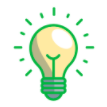

> __Избегайте ловушек при определении типа признака__

> Важно отметить, что несмотря на то, что в качественных (ординальных или категориальных) признаках не фигурируют числа, они все же могут быть закодированы числами. Например, иногда в опросниках мужской пол обозначают как 1, а женский как 0. Однако здесь эти числа не имеют математического значения, поэтому данные не являются количественными (числовыми). То есть, 1 и 0 здесь просто являются символами для обозначения мужчин и женщин. И ни в коем случае нельзя воспринимать их как числа и говорить, что мужчина на 1 больше, чем женщина. Или в социологических опросах часто кодируют шкалы числами. Например, 1- «согласен», 2 – «почти согласен», 3 – «затрудняюсь ответить», 4 – «скорее не согласен», 5 – «не согласен». Нельзя сказать, что человек, ответивший «скорее не согласен» на некую условную единицу более согласен, чем тот, который ответил «не согласен». Такой признак абсолютно точно будет ординальным.

> И заметьте, что часто ординальные признаки называют порядковыми, категориальные - номинальными, а числовые - количественными. Это происходит по той причине, что анализ данных и статистика пронизывают практически все научные области, но исторически в разных науках сформировалась разная терминология.

* __Временные ряды__  
 Значения меняются во времени, например, рост курса рубля к доллару, голос человека на записи, ЭКГ.
* __Изображения__  
 Примеры: видеонаблюдение, компьютерная томография, снимок рентген, спутниковые снимки.
* __Тексты__
 Слова и фразы, к которым можно применять разные задачи: оценивать тональность, искать факты, делать машинный перевод, производить суммаризацию статей (краткое изложение текста с помощью МО).
* __Другие типы__  
 Граф подписок в Instagram, лог работы сервера, показатель растительности поля (NDVI), истории болезни, названия товаров в чеке.

__Практика__

In [2]:
data = pd.read_csv('data_flats.csv',sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

[К содержанию](#1)

---

### Проблемы данных<a name="3"></a>

* __Неполные данные:__ заказчик выслал не все данные, в них есть пропуски, нет данных за определённый период, есть данные только для части задач. Например, есть рейсы только одной авиакомпании, есть суммы покупок с января по март и с июня по декабрь.  

* __Грязные данные:__  
 — данные в плохом или разном формате;  
 — в данных есть мусор, например, смешиваются русские и английские буквы, данные в виде шифра,  
 — разные меры данных, например, часть в метрах, часть в футах;  
 — данные старые, значения признака перемешиваются.

* __Плохая разметка:__ в данных есть ошибки, разная оценка данных из-за человеческого фактора, разметка не соответствует реальности, размеченных данных очень много — должна быть «золотая середина». Чем лучше хотите получить разметку, тем больше времени придётся потратить.  

* __Данные с утечкой:__ в данных нужно избегать признаков, от которых явно зависит целевая переменная. Такая ситуация приводит к тому, что во время обучения модель всё предсказывает, но в боевых условиях бесполезна.

[К содержанию](#1)

---

### Работа с пропусками<a name="4"></a>

__Пропуски__ — отсутствие значений в данных. Обычно это случается из-за __ошибок человека__: забыли, какие данные не внесли, не всё перенесли из другого документа, неверно заполнили документ, случайно удалили часть данных. Например, при опросе респонденты отвечали только на часть вопросов, не указывая какие-то данные.

__Что делать с пропусками?__

* __Удалить пропуски:__ удалить строки с пропусками, если таких строк немного, или столбцы (признаки) в данных, если их много, и это не повлияет на результат в целом.
* __Заменить пропуски:__ заменить на среднее значение (медианой) или на самый часто попадающийся вариант. Например, опрос респондентов проходил в Москве, вероятнее, большинство — жители города, а не туристы. Значит, в графе город можно поставить «Москва». Или же по другим данным в документе можно восстановить пол людей, которые его не указали.
* __Записать новое значение:__ например, вместо пропуска в столбце «Пол» указать «не определён».
* __Заменить алгоритмами МО:__ признак можно считать целевой переменной и обучать модель, чтобы предсказать пропущенные значения.

__Практика__

Создадим __тестовый набор данных__:

In [4]:
test_data = pd.DataFrame([[1, 2, np.nan], [3, np.nan, 4], 
                          [0, 1, 2]], columns=['one', 'two', 'three'])

In [5]:
test_data

,one,two,three
0,1,2.0,NaN
1,3,NaN,4.0
2,0,1.0,2.0


В данных часто бывают __пропуски__. В __Pandas__ их можно находить с помощью __метода `.isna()`__:

In [6]:
test_data.isna()

,one,two,three
0,False,False,True
1,False,True,False
2,False,False,False


Можно находить пропуски в пределах одного признака (столбца):

In [7]:
test_data['two'].isna()

0    False
1     True
2    False
Name: two, dtype: bool

С помощью __метода `.dropna()`__ можно __удалять__ столбцы/строки с пропусками, указывая ось с помощью __параметра `axis`__.  

Если нужно удалить __строки__, в которых встречается пропуск (NaN), __`axis=0`__:

In [8]:
test_data

,one,two,three
0,1,2.0,NaN
1,3,NaN,4.0
2,0,1.0,2.0


In [9]:
test_data.dropna(axis=0)

,one,two,three
2,0,1.0,2.0


Если нужно удалить __столбцы__, в которых встречается пропуск (NaN), __`axis=1`__:

In [10]:
test_data.dropna(axis=1)

,one
0,1
1,3
2,0


По умолчанию, параметр `axis` равен 0:

In [11]:
test_data.dropna()

,one,two,three
2,0,1.0,2.0


Если нужно удалить пропуски только для определенных столбцов (или строк, при указании другого значения параметра `axis`), нужно передать __список индексов__ (номеров строк или названий столбцов) столбцов (или строк) в __параметр `subset`__:

In [12]:
test_data

,one,two,three
0,1,2.0,NaN
1,3,NaN,4.0
2,0,1.0,2.0


In [13]:
test_data.dropna(subset=[0], axis=1)

,one,two
0,1,2.0
1,3,NaN
2,0,1.0


In [14]:
test_data.dropna(subset=['two'], axis=0)

,one,two,three
0,1,2.0,NaN
2,0,1.0,2.0


Иногда удаление строк/столбцов с пропусками - слишком грубое решение. Можно __заменять__ пропуски статистиками или каким-то константным значением с помощью __метода `fillna()`__:

In [15]:
# По умолчанию заменяет все пропуски
test_data.fillna(-1)

,one,two,three
0,1,2.0,-1.0
1,3,-1.0,4.0
2,0,1.0,2.0


Можно заменять разными статистиками, например:
 - среднее значение, __`np.mean()`__
 - максимальное значение, __`np.max()`__
 - минимальное значение, __`np.min()`__
 - медиана, __`np.median()`__

In [16]:
max_two = np.max(test_data['two'])
test_data['two'].fillna(max_two)

0    2.0
1    2.0
2    1.0
Name: two, dtype: float64

Методы типа __`np.mean()`__ можно вызывать у самих столбцов с помощью __`column.mean()`__:

In [17]:
test_data['three'].fillna(test_data['three'].mean())

0    3.0
1    4.0
2    2.0
Name: three, dtype: float64

__Задания__

> *Задача 1*

Загрузите данные train.csv, найдите признак, обозначающий штат. Затем найдите значение, которое встречается чаще всего. Замените пропуски этим значением и запишите получившийся признак в переменную result.

In [18]:
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)

In [19]:
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [20]:
result = vis_data['state'].fillna(vis_data['state'].mode()[0])

> *Задача 2*

Продолжим готовить к анализу наш Data set, посвященный квартирам, выставленным на продажу. Избавимся от пропусков. Просто удалять данные с пропусками довольно грубо. Однако если у вас большое количество объектов, и лишь крайне малая их доля имеет пропущенные значения, то это возможное допущение. Поступим здесь таким образом. Нас будут интересовать только те квартиры, про которые продавцы заполнили все данные. Удалите, пожалуйста, все строки, где есть хотя бы один пропуск. Сколько объектов осталось?

In [21]:
data = data.dropna()
data.shape[0]

13652

[К содержанию](#1)

---

### Начальная обработка<a name="5"></a>

Некоторые алгоритмы чувствительны к __масштабу признаков__: если масштаб разный — алгоритмы хуже сходятся к оптимальным значениям. Один из способов обработки данных — __нормализация__ — процесс приведения данных к одному масштабу, обеспечивает лучшие условия выборки, изменения, удаления данных.  

Необходимость нормализации данных объясняется сутью используемых алгоритмов и математических моделей. Из-за того, что данные могут описывать совершенно разные явления и показатели, их значения могут различаться в несколько порядков. Например, представим, что в датасете о физических данных человека есть одновременно его вес в граммах и концентрация глюкозы в крови (которая выражается в тысячных). Или, к примеру, мы изучаем состояние экологии города и получаем данные сразу о концентрации вредного вещества (в тысячных процента) и о давлении (в сотнях тысяч атмосфер). Тогда наши значения признаков будут отличаться в миллионы (или даже десятки миллионов раз!). К сожалению, работа математических моделей на таких данных даст нерелевантные результаты, и окажется просто бесполезной. Это происходит по той причине, что большинство методов чувствительны к диапазону входных данных и крайне желательно, чтобы он был как можно меньше.То есть, чтобы все признаки были приведены к некоторой единой системе.

__Базовые методы нормализации:__

* __MinMax__ нормализация — приведение данных к масштабу между 0 и 1.
* __Стандартная нормализация__ — данные имеют среднее 0 и стандартное отклонение 1.

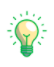

> Иногда данные лучше __удалить__, если они не несут пользы. Например, столбец считался по ошибке и содержит мусор, или признак не имеет полезной информации, или столбец содержит всегда одинаковое значение.

__Практика__

In [22]:
test_data = pd.DataFrame([[1, 2, np.nan], [3, np.nan, 417], 
                          [0, 10, -212]], columns=['one', 'two', 'three'])

In [23]:
test_data

,one,two,three
0,1,2.0,NaN
1,3,NaN,417.0
2,0,10.0,-212.0


> __Нормализация: теория__  
Некоторые алгоритмы обращают внимание на масштаб переменных - это помогает алгоритму (например, градиентному спуску) лучше сходиться. Для этого нужно делать нормализацию данных - приведение переменных к одному масштабу.  
Кроме этого, если есть несколько наборов данных одной природы, но разного размера, их нужно нормализовать, чтобы иметь возможность сравнить влияние каких-то других признаков.  
Несмотря на то, что некоторые алгоритмы работают независимо от масштаба признаков, хуже от нормализации обычно не становится.  
Когда мы говорим о нормализации, мы говорим о числах.   
Мы посмотрим на работу методов нормализации из библиотеки __`sklearn`__. На вход будем подавать __`pandas.DataFrame`__, на выходе будем получать __`np.ndarray`__. Информация о структуре __`pandas`__-таблицы теряется.

>__MinMax нормализация__  
Одним из стандартных способов нормализации является __`minmax`__ нормализация.  
Данный вид нормализации приводит независимо каждый признак к значению между 0 и 1.  
Как это работает? Для каждого признака алгоритм находит минимальное ($x_{min}$) и максимальное ($x_{max}$) значение, после этого признак `x` трансформируется в $$x := \frac{x - x_{min}}{x_{max} - x_{min}}$$

In [24]:
test_data = test_data.fillna(0)

In [25]:
test_data

,one,two,three
0,1,2.0,0.0
1,3,0.0,417.0
2,0,10.0,-212.0


In [26]:
scaler = MinMaxScaler()
scaler.fit_transform(test_data)

array([[0.33333333, 0.2       , 0.33704293],
       [1.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ]])

>__Std нормализация (стандартная нормализация)__  
__`std`__ нормализация (иначе называется __`стандартная нормализация`__ или __`zero mean, unit variance`__) - еще один вид нормализации признаков.  
Как он работает? Для каждого признака алгоритм независимо находит среднее значение ($x_{mean}$) и стандартное отклонение ($x_{std}$), после этого признак `x` трансформируется в $$x := \frac{x - x_{mean}}{x_{std}}$$

In [27]:
scaler = StandardScaler()
scaler.fit_transform(test_data)

array([[-0.26726124, -0.46291005, -0.26151831],
       [ 1.33630621, -0.9258201 ,  1.33438124],
       [-1.06904497,  1.38873015, -1.07286293]])

__`MinMaxScaler`__ и __`StandardScaler`__ сохраняют параметры, с которыми проводит нормализацию. Это значит, что после нормализации признаков в тренировочной выборке нужно будет применить ту же нормализацию с валидационными и тестовыми данными. Про валидацию мы поговорим позже.

Иногда в данных находятся признаки (столбцы), которые не несут никакой полезной информации или были считаны по ошибке.  
Их можно можно удалить с помощью метода __`.drop(column_names, axis=1)`__. В __`columns`__ необходимо передать или название признака (столбца), или список названий признаков (столбцов):

In [28]:
test_data

,one,two,three
0,1,2.0,0.0
1,3,0.0,417.0
2,0,10.0,-212.0


In [29]:
test_data.drop('one', axis=1)

,two,three
0,2.0,0.0
1,0.0,417.0
2,10.0,-212.0


In [30]:
test_data.drop(['one', 'three'], axis=1)

,two
0,2.0
1,0.0
2,10.0


Если в предыдущем методе в параметр `axis` передавать `0`, метод будет удалять строки с номерами, которые вы передадите (или один номер, или список номеров):

In [31]:
test_data.drop(0, axis=0)

,one,two,three
1,3,0.0,417.0
2,0,10.0,-212.0


In [32]:
test_data.drop([0, 2], axis=0)

,one,two,three
1,3,0.0,417.0


__Задания__

Загрузите данные train.csv, найдите признак, обозначающий баланс. Нормализуйте признак с помощью std-нормализации. Проверьте, что вы нашли нужный признак и нормализовали его подходящим методом. Метод для нормализации принимает матрицу, а не массив. В numpy можно превратить массив в матрицу с помощью reshape(). В качестве ответа укажите минимальное значение в получившемся нормализованном признаке. Ответ округлите до 5 знаков после запятой.

In [33]:
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)

In [34]:
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [35]:
scaler = StandardScaler()

In [36]:
balance = np.column_stack(vis_data['balance_due'])

In [37]:
balance = np.reshape(balance, (balance.shape[1],1))

In [38]:
np.round(scaler.fit_transform(balance).min(),5)

-13.14733

[К содержанию](#1)

---

### Визуализация<a name="6"></a>

Один из способов визуализации — __гистограмма__ — вид диаграммы, показывающий данные в форме столбцов. Демонстрирует распределение данных по выборке внутри столбца и значений в признаке. Позволяет увидеть проблемы или некорректные значения в данных, преобразовать их в наглядную форму и распределить, чтобы облегчить работу.

__Correlation plot__ — корреляционный график. Признаки в данных могут иметь сильную корреляцию, то есть __линейную зависимость__. Если зависимость большая, признаки несут избыточную информацию, поэтому скореллированные признаки лучше удалять.

Кроме визуализации распределения числовых признаков с помощью гистограммы, возможно еще представление с использованием ящика с усами (или боксплота). Их преимущество состоит в том, что с помощью одной диаграммы можно представить основные описательные статистики: медиану, а также верхний (третий) и нижний( первый) квартили. Напомним, что данные показатели являются робастными (устойчивыми к выбросам), что позволяет представлять с помощью этой диаграммы даже признаки с наличием выбросов. Причем, выбросы будут обозначены с помощью кружочков. То есть, по сути, с помощью построения боксплота можно даже выявить наличие выбросов в ваших данных.

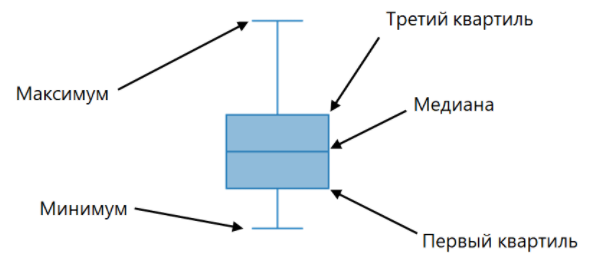

Также преимущество боксплота заключается в том, что можно сравнивать на одном графике данные сразу для нескольких признаков. Например, у нас есть две группы студентов, которые написали тест, оцениваемый от 0 до 100. По этим данным мы построили диаграммы:

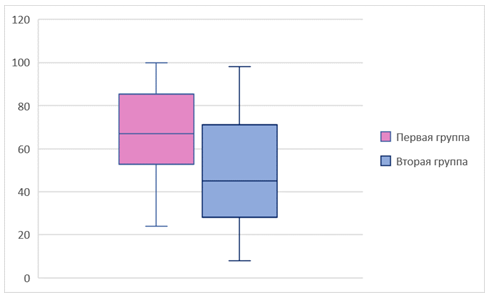

По этим диаграммам мы можем сделать вывод, что у первой группы выше наибольший результат (по сравнению со второй группой) и выше наименьший результат. Кроме того, медианное значение также выше. А у второй группы по отношению к первой разброс значений больше.

Примеры кода для построения боксплотов можно посмотреть в галерее библиотеки seaborn:

[Примеры боксплотов](https://www.python-graph-gallery.com/boxplot/)

__Практика__

>__Гистограмма__  
Гистограмма показывает распределение данных. С помощью нее можно увидеть, как распределены данные, есть ли выбросы.  

Загрузим данные:

In [39]:
vis_data = pd.read_csv("train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0


Один из начальных этапов работы с данных - визуализация и поиск проблем, которые можно решить. О визуализации в целом мы поговорим позже, здесь мы обсудим применение в контексте предобработки.  
Многие алгоритмы работают лучше, когда на вход принимают данные, распределенные нормально.  
Посмотрим на гистограмму какого-нибудь из признаков. Для удобства оставим только значения больше 0.  
**Совет** - на деле удаление из рассмотрения значений меньше 0 является не удобством, а необходимостью. Например, если признак обозначает выплату зарплаты, он не может быть меньше 0; тогда любые значения меньше 0 являются выбросами, мы поговорим о них чуть позже. 

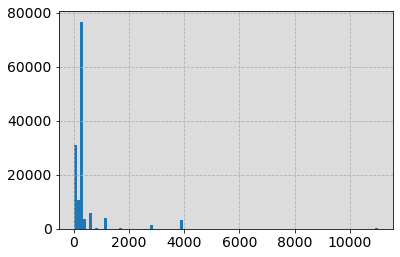

In [40]:
vis_data.balance_due[vis_data.balance_due > 0].hist(bins=100);

Одним из способов сделать данные более "нормальными" является взятие логарифма.  
При этом, не должно быть значений, равных 0, иначе метод `np.log` выдаст $-\infty$.

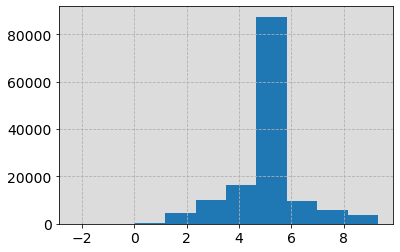

In [41]:
np.log(vis_data.balance_due[vis_data.balance_due > 0]).hist();

Другим способом является взятие квадратного корня от данных:

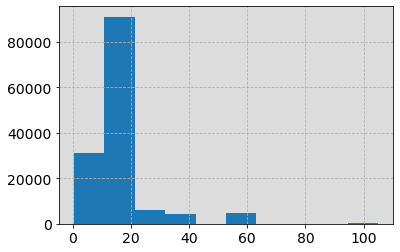

In [42]:
np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]).hist();

Выше мы явно отсекли значения в данных, равные `0`. Если значения все-таки начинаются с `0`, перед взятием логарифма можно прибавить `1` к данным. Логарифм от `1` превратится в `0`.

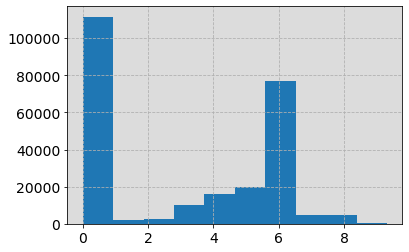

In [43]:
np.log(vis_data.balance_due[vis_data.balance_due >= 0] + 1).hist();

>__Correlation plot__  
Некоторые признаки сильно скоррелированы друг с другом. Это значит, между этими признаками есть некоторая линейная зависимость. Если зависимость большая - часть скоррелированных признаков (не все) следует убрать из выборки, так как они несут избыточную информацию.  
При этом, отсутствие корреляции не означает отсутствие зависимости - между признаками в таком случае может быть сложная нелинейная зависимость.  
Для определения такой зависимости, можно посчитать матрицу корреляции для признаков и построить, например, heatmap, чтобы проще было увидеть зависимость.  
На главной диагонали этой матрицы будут стоять единицы, потому что для признака считается корреляция с самим собой.

In [44]:
corr = vis_data.drop(['violation_zip_code', 'payment_amount', 
                      'clean_up_cost', 
                      'violation_street_number'], axis=1).\
                dropna(axis=1).\
                corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ticket_id,admin_fee,state_fee,late_fee,discount_amount,judgment_amount,balance_due
ticket_id,1.00,-0.04,-0.04,-0.01,-0.02,-0.01,0.00
admin_fee,-0.04,1.00,1.00,0.29,0.03,0.32,0.28
state_fee,-0.04,1.00,1.00,0.29,0.03,0.32,0.28
late_fee,-0.01,0.29,0.29,1.00,-0.01,0.99,0.95
discount_amount,-0.02,0.03,0.03,-0.01,1.00,0.04,-0.02
judgment_amount,-0.01,0.32,0.32,0.99,0.04,1.00,0.94
balance_due,0.00,0.28,0.28,0.95,-0.02,0.94,1.00


__Задания__

> *Задача 1*

Загрузите данные train.csv, найдите признак, обозначающий баланс. Для приведения данных к более нормальному виду часто используют различные преобразования, например, взятие корня от признака.
Возьмите корень у положительных значений, найдите медианное и среднее значение. В качестве ответа укажите модуль разницы этих значений.

In [45]:
vis_data = pd.read_csv("train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0


In [46]:
balance = vis_data['balance_due']

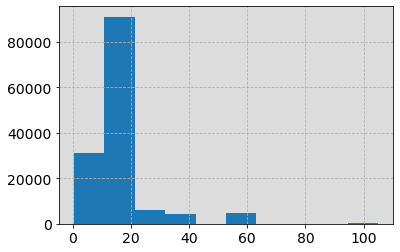

In [47]:
np.sqrt(balance[balance > 0]).hist();

In [48]:
np.sqrt(balance[balance > 0]).median() - np.sqrt(balance[balance > 0]).mean()

0.4525960609393067

> *Задача 2*

Вернемся к первичному анализу наших данных по квартирам, выставленным на продажу. Предположим, что вы хотите проанализировать состояние цен на квартиры в нескольких  районах : "Лефортово", "Перово", "Басманное" и "Богородское". Для того, чтобы сравнить цены на квартирах в этих районах, можно использовать визуализацию с помощью боксплотов. Постройте боксплоты для распределения цен по этим районами (должно получиться четыре боксплота - по одному для каждого района). На основании полученных диаграмм ответьте на вопросы ниже.

In [49]:
data = pd.read_csv('data_flats.csv',sep=";")
data.head(2)

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000


In [50]:
data['sub_area'].unique()

array(['Bibirevo', 'Nagatinskij Zaton', "Tekstil'shhiki", 'Mitino',
       'Basmannoe', 'Nizhegorodskoe', "Sokol'niki", 'Koptevo', 'Kuncevo',
       'Kosino-Uhtomskoe', 'Zapadnoe Degunino', 'Presnenskoe',
       'Lefortovo', "Mar'ino", "Kuz'minki", 'Nagornoe', "Gol'janovo",
       'Vnukovo', 'Juzhnoe Tushino', 'Severnoe Tushino',
       "Chertanovo Central'noe", 'Fili Davydkovo', 'Otradnoe',
       'Novo-Peredelkino', 'Bogorodskoe', 'Jaroslavskoe', 'Strogino',
       'Hovrino', "Moskvorech'e-Saburovo", 'Staroe Krjukovo', 'Ljublino',
       'Caricyno', 'Veshnjaki', 'Danilovskoe', 'Preobrazhenskoe',
       "Kon'kovo", 'Brateevo', 'Vostochnoe Izmajlovo', 'Vyhino-Zhulebino',
       'Donskoe', 'Novogireevo', 'Juzhnoe Butovo', 'Sokol', 'Kurkino',
       'Izmajlovo', 'Severnoe Medvedkovo', 'Rostokino',
       'Orehovo-Borisovo Severnoe', 'Ochakovo-Matveevskoe', 'Taganskoe',
       'Dmitrovskoe', 'Orehovo-Borisovo Juzhnoe', 'Teplyj Stan',
       'Babushkinskoe', 'Pokrovskoe Streshnevo', 'Obruc

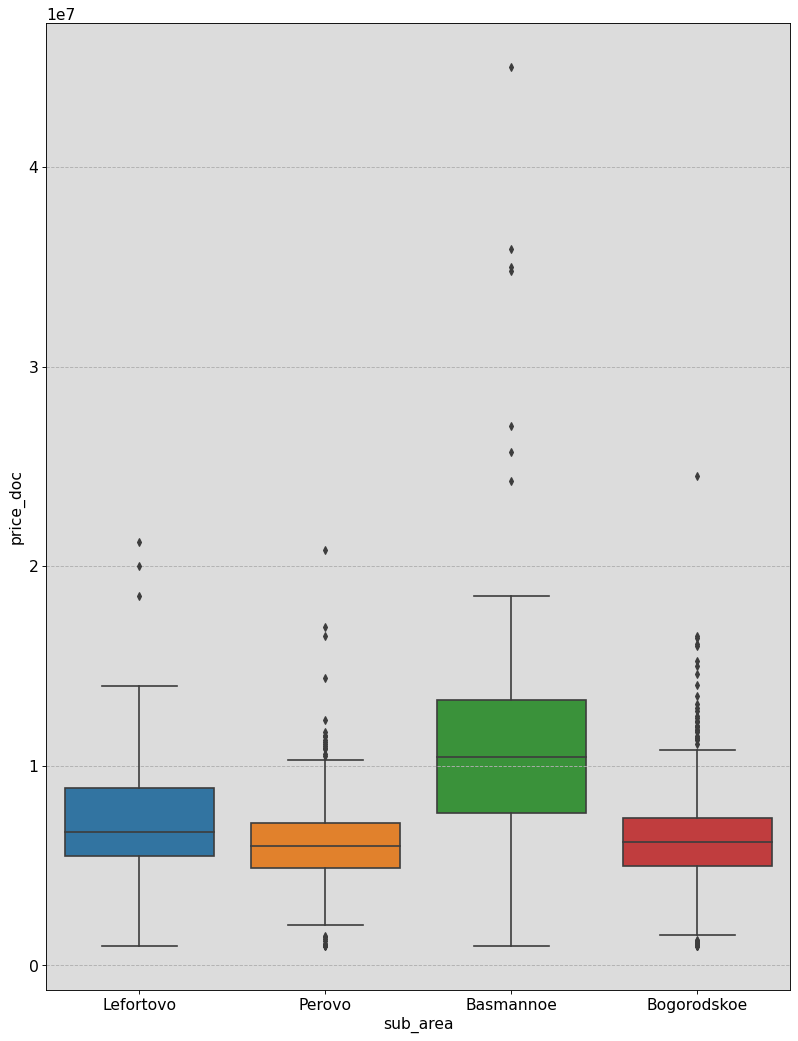

In [51]:
plt.figure(figsize=(12, 16), dpi=80)
sns.boxplot(x='sub_area', y='price_doc', data=data, order=["Lefortovo", "Perovo", "Basmannoe", 'Bogorodskoe'])
plt.show()

[К содержанию](#1)

---

### Feature Engineering<a name="7"></a>

__Feature Engineering__ — способ создания признаков, техника решения задач МО, которая увеличивает качество разрабатываемых алгоритмов. Превращает специфичные данные в понятные для модели __векторы__.

__Способы:__

* __Ручное создание признаков__  
 Новые признаки можно создавать на основе имеющихся, если понятно, что означает тот или иной признак. Техника может значительно улучшить модель, но требуется погружение в предметную область. Например, зная массу и рост человека, можно посчитать индекс массы тела; зная координаты места нарушения ПДД и центра города, можно посчитать расстояние между ними.
* __Полиномиальные признаки__  
 Например, попарное перемножение имеющихся столбцов, чтобы получить нелинейные комбинации признаков. Другой пример — возведение признаков в квадрат или корень из признака, чтобы получить искусственные признаки.
* __Dummy-переменные__  
 Между категориальными признаками не всегда есть порядок, поэтому их следует заменять на dummy-переменные, в виде цифр, чтобы алгоритм подумал, что в данных есть порядок. Например, лев, тигр, медведь лучше записать как 0, 1, 2. Расстояние между «лев» и «тигр» равно 1, а между «лев» и «медведь» — 2, хотя это не так. Решение — создать новые признаки по количеству категорий. Для признака «лев» значение будет 1, если это лев, иначе 0. Теперь расстояния между всеми признаками равны 1.
* __Работа с датой/временем__  
 Обычно дата — это строка, похожая на «2005-06-02». В таком виде признак имеет мало смысла, но его можно разделить на набор других признаков. Модель не принимает текст, поэтому заменяем его на набор других числовых признаков. Например, день, месяц, год или день недели, праздник/выходной.
* __Статистики по наборам признаков__  
 Если в данных есть признаки, описывающие значение в разные моменты времени, то они могут быть полезными. Например, зарплата_2016, зарплата_2017, зарплата_2018. Отсюда можно вытащить среднюю зарплату за 3 года, медианную зарплату, динамику зарплаты, максимальную и минимальную зарплату.

__Практика__

Создание новых признаков - трудоемкий процесс, который позволяет значительно повысить точность модели при правильном использовании методов создания новых признаков. Самое большое повышение точности обычно случается после того, как Data Science разработчик погружается в предметную область задачи, потому что это позволяет создавать новые признаки осмысленно.  
Несмотря на это, есть автоматические/полуавтоматические методы создания новых признаков, о которых мы поговорим ниже.  
Для исследования темы создания новых признаков воспользуемся датасетом `vis_data` и дополним его новой информацией:

In [52]:
vis_data = pd.read_csv("train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data = vis_data.drop(['violation_zip_code', 'clean_up_cost'], axis=1)
latlons = pd.read_csv("latlons.csv")
vis_data = pd.concat([vis_data, latlons], axis=1)

> __Ручное создание признаков__  
Ручное создание признаков требует погружения в предметную область задачи и не всегда гарантирует положительный результат.  
Часто данные приходят без пояснения и есть только сами табличные данные и, если повезет, названия признаков. Нам повезло. Посмотрим на данные и на названия признаков:

In [53]:
vis_data.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,mailing_address_str_number,mailing_address_str_name,city,state,...,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance,address,lat,lon
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,3.0,S. WICKER,CHICAGO,IL,...,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"4300 rosa parks blvd, Detroit MI 48208",42.346169,-83.079962
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,2959.0,Martin Luther King,Detroit,MI,...,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0,"14512 sussex, Detroit MI",42.394657,-83.194265


In [54]:
vis_data.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'mailing_address_str_number', 'mailing_address_str_name', 'city',
       'state', 'zip_code', 'non_us_str_code', 'country', 'ticket_issued_date',
       'hearing_date', 'violation_code', 'violation_description',
       'disposition', 'fine_amount', 'admin_fee', 'state_fee', 'late_fee',
       'discount_amount', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance', 'address', 'lat',
       'lon'],
      dtype='object')

Судя по названию переменных, это данные о нарушителях, которые должны платить штраф за какое-то правонарушение.  
Есть переменная compliance, которая принимает значения `0`, `1` и `None`. Так как описания нет, мы можем предположить, что 0 - нарушитель заплатил штраф, 1 - не заплатил. Что в данном контексте означает None понять трудно, возможно, это пропуски, которые следует просто выбросить.  
Кроме изначальных признаков нам также дали ширину и долготу. Также, есть признак `city`. Что можно сделать с таким набором признаков? Например, можно посмотреть расстояние от точки правонарушения до центра города, в котором произошло нарушение. Давайте сначала исследуем, какие города представлены в выборке:

In [55]:
# Можно посмотреть на value_counts, не ограничивая вывод, 
# чтобы увидеть, как много там разных значений
vis_data.city.value_counts()[:10]

DETROIT             136936
SOUTHFIELD           13436
Detroit              10496
detroit               4183
DEARBORN              3637
FARMINGTON HILLS      2329
OAK PARK              2216
WARREN                2000
DET                   1657
W. BLOOMFIELD         1635
Name: city, dtype: int64

Видно, что подавляюще большую часть значений составляет `DETROIT`. Также, чуть ниже видны `Detroit` и `detroit`.  
Название города с самым большим количеством нарушений записано по-разному в данных. Возможно, некоторые другие города тоже записаны в разном регистре.  

In [56]:
vis_data.city = vis_data.city.apply(lambda x: x.lower())

In [57]:
vis_data.city.value_counts()[:10]

detroit             151621
southfield           14760
dearborn              4017
farmington hills      2508
oak park              2432
warren                2150
det                   1928
livonia               1798
w. bloomfield         1795
redford               1718
Name: city, dtype: int64

Теперь мы более точно видим, что большинство преступлений (из представленных в выборке) совершается в Детройте.  
Возможно, информативным признаком будет расстояние от места правонарушения до центра Детройта.  
Теперь давайте найдем для каждого нарушения, для которого есть широта и долгота, его расстояние до центра Детройта со следующими координатами:
 - широта: 42.331429
 - долгота: -83.045753

In [58]:
from math import radians, sin, cos, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2) ** 2
    c = 2 * asin(sqrt(a))
    earth_radius = 6371 
    return c * earth_radius

vis_data['distance'] = vis_data.apply(lambda row: 
                                      haversine(lon1 = -83.045753, 
                                                lat1 = 42.331429,
                                                lon2 = row['lon'], 
                                                lat2 = row['lat']), 
                                      axis=1)

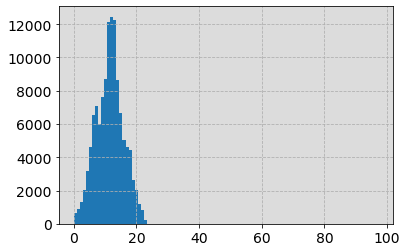

In [59]:
vis_data['distance'][vis_data['distance'] < 100].hist(bins=100);

> __Создание полиномиальных признаков__  
Теперь рассмотрим более механические и менее интеллектуальные способы создать признаки. Новые признаки можно создавать, просто перемножением и делением старых признаков друг на друга.  
Кроме этого, можно брать один признак и возводить его, например, в квадрат или брать из него корень. То есть, в более общем виде, можно создать новый признак из старого, возведя все значения старого признака в дробную степень.

In [60]:
from sklearn.preprocessing import PolynomialFeatures

Класс `PolynomialFeatures` из библиотеки `sklearn` принимает на вход набор признаков и на выходе отдает полиномиальные признаки, сгенерированные на основе входных и со степенью меньше либо равной указанной.  
Например, для признаков `[a, b]` и степени `2` он вернет `[1, a, b, a^2, ab, b^2]`.

In [61]:
pf = PolynomialFeatures(2)

In [62]:
poly_features = pf.fit_transform(vis_data[['balance_due', 'payment_amount']])
poly_features

array([[1.0000e+00, 3.0500e+02, 0.0000e+00, 9.3025e+04, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 7.5000e+01, 7.8000e+02, 5.6250e+03, 5.8500e+04,
        6.0840e+05],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [63]:
poly_features.shape

(250306, 6)

> __Dummy-переменные__  
Когда мы говорим о категориальных признаках, есть два основных случая:
> - Категориальный признак содержит строки, никакая модель не примет их на вход, потребуется некоторое преобразование
> - Категориальный признак содержит числа. В таком случае, в принципе, можно никак не трогать этот признак, но это будет неправильно с точки зрения логики обучения модели.
 
Рассмотрим второй случай: есть признак "тип животного", который принимает `n` различных значений: значение 0, если животное - кошка, 1 - если тигр, 2 - если пантера. В отличие от `continuous` признаков, то есть, имеющих некоторый порядок, категориальные признаки такого порядка не имеют - мы не можем строго сравнить тигра и пантеру, это просто разные сущности. Некоторые алгоритмы могут работать с категориальными признаками, некоторые - нет.  
Естественной предобработкой для таких признаков является создание dummy-переменных на основе категориального признака, то есть, создание `n` признаков-индикаторов. Каждый из индикаторов равен 1 тогда, когда в изначальном примере выбрано соответствующее значение и 0 иначе. 
 

Преобразуем признак `state` в dummy-переменные и посмотрим его `shape`:

In [64]:
pd.get_dummies(vis_data.state).shape

(250306, 59)

Теперь преобразуем признак `city` в dummy-переменные. Для этого сначала требуется сделать небольшую предобработку, чтобы сократить количество уникальных значений в этом признаке. Для начала, найдем города, которые описывают большинство (`90%`) примеров:

In [65]:
cities_with_freqs = list(vis_data.city.value_counts())

In [66]:
top_cities_count = int(np.percentile(cities_with_freqs, 90))
top_cities_count

14

Теперь оставим только этот топ городов, остальные города назовем `other`:

In [67]:
all_cities = vis_data.city.value_counts().index
top_cities = list(all_cities)[:top_cities_count]
cities_to_throw_away = list(set(all_cities) - set(top_cities))
vis_data.loc[vis_data['city'].isin(cities_to_throw_away), 
             'city'] = 'other'

Теперь количество уникальных значений в признаке `city` сократилось до:

In [68]:
len(vis_data.city.value_counts())

15

Можем создать dummy-признаки для этой переменной:

In [69]:
pd.get_dummies(vis_data.city, drop_first=True).head()

,dearborn,det,detroit,eastpointe,farmington hills,livonia,oak park,other,redford,southfield,troy,w. bloomfield,warren,west bloomfield
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0


> __Работа с датой/временем__  
`Pandas` поддерживает работу с датами.  
[Больше про работу с временем в pandas](https://codeburst.io/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f)  

Выберем признак, содержащий время, уберем пропуски и преобразуем его в специальный формат для работы со временем:

In [70]:
datetime_vals = pd.to_datetime(vis_data.payment_date.dropna())

In [71]:
datetime_vals.head()

1    2005-06-02
11   2005-03-17
15   2005-02-11
18   2005-03-18
19   2005-03-18
Name: payment_date, dtype: datetime64[ns]

Теперь к этим значениям можно обращаться для определения дня, месяца или года:

In [72]:
datetime_vals[1].month

6

Кроме этого, можно вытаскивать такие признаки, как день недели:

In [73]:
datetime_vals[1].weekday()

3

Отсчет начинается с понедельника и с нуля, поэтому мы понимаем, что это четверг.  
Почему это может быть важным признаком? Например, в текущем наборе данных можно использовать такой признак как будний день/выходной, чтобы определить, когда чаще совершают правонарушения:

In [74]:
dt_issued_date = pd.to_datetime(vis_data.ticket_issued_date)
vis_data['is_weekend'] = dt_issued_date.dt.weekday > 4
vis_data['wd'] = dt_issued_date.dt.weekday

Здесь мы воспользовались специальным селектором `dt`, который для удобства содержит методы для работы со временем в `pandas`.  

> __Статистики по наборам признаков__  
Одним из интересных способов использовать данные для создания новых признаков является расчет различных статистик по данным.  
Примерами статистик могут быть минимум, максимум, стандартное отклонение и многие другие.  
Этот способ работает, если в данных содержится, помимо прочих признаков, некоторое подобие временных рядов.  
Например, примеры - это продукты, а зависимая переменная - купит ли покупатель этот продукт. Признаками, которые нас интересуют, будут стоимость данного продукта за 2015, 2016 и 2017 годы. В таком случае мы можем взять среднее, медиану, максимум, минимум и что угодно еще по этим трем столбцам и получить множество новых признаков.  
Не факт, что данные признаки будут полезны, это мы увидим на этапе валидации и тестирования. Но часто такие признаки действительно оказываются полезными.

__Задания__

> *Задача 1*

Загрузите данные train.csv, оставьте в нем только 2 признака: balance_due и payment_amount (признаки должны следовать именно в указанном порядке). Создайте из полученных признаков полиномиальные признаки степени 3. Посчитайте среднее значение для каждого получившегося признака. В качестве ответа укажите индекс признака, который содержит максимальное среднее значение.

In [75]:
vis_data = pd.read_csv("train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0


In [76]:
vis_data = vis_data[['balance_due', 'payment_amount']]

In [77]:
pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(vis_data)
poly_features.mean(axis = 0).argmax()

6

> *Задача 2*

Загрузите данные train.csv, найдите признак, обозначающий дату, когда был выписан штраф. Найдите, сколько раз штраф был выписан на выходных и запишите это число в качестве ответа.

In [78]:
vis_data = pd.read_csv("train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0


In [79]:
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [80]:
dt_issued_date = pd.to_datetime(vis_data['ticket_issued_date'].dropna())

In [81]:
dt_issued_date.head()

0   2004-03-16 11:40:00
1   2004-04-23 12:30:00
2   2004-04-26 13:40:00
3   2004-04-26 13:30:00
4   2004-04-26 13:00:00
Name: ticket_issued_date, dtype: datetime64[ns]

In [82]:
vis_data['is_weekend'] = dt_issued_date.dt.weekday > 4
vis_data['is_weekend'].head()

0    False
1    False
2    False
3    False
4    False
Name: is_weekend, dtype: bool

In [83]:
vis_data['is_weekend'][vis_data['is_weekend'] == True].count()

1620

> *Задача 3*

Ранее мы уже выяснили, что данные о квартирах не все числовые. Есть и признаки, которые содержат текстовые значения : ординальный (уровень экологии) и категориальный (район). Нам обязательно нужно перекодировать эти признаки, так как иначе мы не сможем в дальнейшем работать с этим датасетом и применять на нем какие-то математические алгоритмы. 

Ординальный признак мы можем перекодировать в числовой довольно простым способом: просто заменить каждое значение на число (4 - 'excellent', 3 - 'good' etc.).

Для этого необходимо:

* создать словарь, сопоставляющий числовые значения от 0 до 4 описанию экологии от 'no data' до 'excellent' соответственно
* заменить значения в колонке ecology на заданные нами выше с помощью метода .replace :
> data.ecology = data.ecology.replace(to_replace=ecology_dict)

Теперь необходимо разобраться с переменной, содержащей информацию о районе.  Для этого воспользуйтесь методом get_dummies

In [84]:
data = pd.read_csv('data_flats.csv',sep=";")
data.head(2)

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000


In [85]:
data['ecology'].unique()

array(['good', 'excellent', 'poor', 'satisfactory', 'no data'],
      dtype=object)

In [86]:
ecology_dict = dict(zip(data['ecology'].unique(),[3,4,1,2,0]))
ecology_dict

{'good': 3, 'excellent': 4, 'poor': 1, 'satisfactory': 2, 'no data': 0}

In [87]:
data.ecology = data.ecology.replace(to_replace=ecology_dict)

In [88]:
data['ecology'].mean()

1.7282483836030063

In [89]:
sub_area_dummy = pd.get_dummies(data['sub_area'])

In [90]:
data = pd.concat([data, sub_area_dummy], axis=1)

In [91]:
data.shape

(30469, 202)

[К содержанию](#1)

---

### Поиск выбросов<a name="8"></a>

__Выброс__ — результат измерения, который выделяется из общей выборки. Выбросы появляются из-за ошибок в данных и сильно выделяющихся среди остальных значений. Их нужно искать и удалять, иначе данные будут подстраиваться под них и давать неверный результат.

__Как искать выбросы:__

* __Поиск и удаление по порогу__  
 Способ нахождения выбросов, основанный на здравом смысле и методе пристального взгляда. Посмотреть данные и поискать невозможные и нелогичные значения, например, в столбце «высота здания» стоит 30 км.
* __Поиск с помощью статистики__  
 Поиск с помощью здравого смысла трудно автоматизировать, поэтому эффективнее статистические методы. Например, поиск по отклонению или по распределению IQR (interquartile range, межквартильное расстояние).
* __Поиск с помощью DBSCAN__
 Поиск с помощью методов кластеризации, один из таких методов — DBSCAN, который может автоматически находить шум в данных.

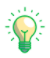

Разные способы поиска выбросов могут давать разные результаты. Не всегда выделяющееся значение будет являться выбросом, возможно, у нас пока просто не хватает данных.

__Практика__

In [92]:
vis_data = pd.read_csv("train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data = vis_data.drop(['violation_zip_code', 'clean_up_cost'], axis=1)
latlons = pd.read_csv("latlons.csv")
vis_data = pd.concat([vis_data, latlons], axis=1)

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2) ** 2
    c = 2 * asin(sqrt(a))
    earth_radius = 6371 
    return c * earth_radius

vis_data['distance'] = vis_data.apply(lambda row: 
                                      haversine(lon1 = -83.045753, 
                                                lat1 = 42.331429,
                                                lon2 = row['lon'], 
                                                lat2 = row['lat']), 
                                      axis=1)

> __Поиск и удаление по порогу__  
Часто оказывается так, что при погружении в предметную область вы начинаете понимать, какие значения данные признаки могут принимать, а какие - не могут.  

Например, если нужно заплатить штраф, полезно будет проверить, нет ли в выборке значений штрафов, меньших, чем `0`:

In [93]:
np.sum(vis_data.fine_amount < 0)

0

Кроме этого, интересно посмотреть максимальное значение штрафа:

In [94]:
max_fine = np.max(vis_data.fine_amount)
max_fine

10000.0

И сколько раз и как часто такой штраф встречается в данных:

In [95]:
max_fine_count = np.sum(vis_data.fine_amount == max_fine)
max_fine_count, max_fine_count/vis_data.shape[0]

(357, 0.0014262542647799094)

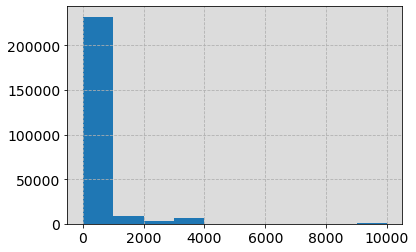

In [96]:
vis_data.fine_amount.hist();

Очень большое количество данных сосредоточено около 0. Посмотрим, сколько значений штрафов в выборке равно 0:

In [97]:
vis_data[vis_data.fine_amount == 0].shape[0]

195

Возможно, те значения, где размер штрафа равен 0, являются выбросами, если инспектор забыл добавить размер штрафа или ошибся при вводе.  
В таком случае эти значения следует убрать из выборки. В то же время, сложно однозначно сделать такое решение, не зная всей информации о данных.

Теперь посмотрим на данные поближе:

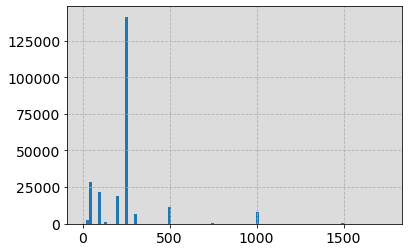

In [98]:
vis_data.fine_amount[vis_data.fine_amount < 2000].hist(bins=100);

Непохоже, что здесь есть выбросы (кроме нулевых штрафов), но можно категоризировать данные, заменив все значения больше 2000 на переменную `>2000` и сделав все остальные значения категориальными.

> __Поиск по отклонению (z-score)__  
> [Источник](http://colingorrie.github.io/outlier-detection.html)

> Есть еще один способ поиска выбросов, не требующий настолько же пристального взгляда на данные, что и предыдущий метод.  
Он основан на поиске значения, на которое отклоняется данная точка от среднего. Делается это с помощью z-score, то есть, расстояния (измеряемого в количестве стандартных отклонений) от среднего значения точек.  


Для начала посмотрим на распределение данных для признака `distance`, который мы посчитали ранее:

In [99]:
import warnings

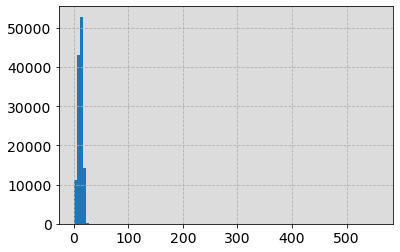

In [100]:
vis_data.distance.hist(bins=100);

Попытаемся "на глаз" определить порог, после которого мы считаем выбросы. Применим этот порог и посмотрим на количество "выбросов":

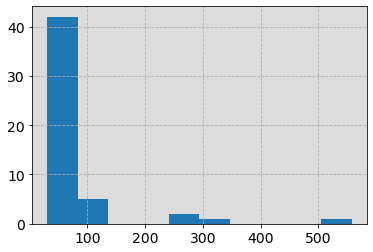

In [101]:
vis_data.distance[vis_data.distance > 30].hist();

In [102]:
def outliers_z_score(ys, threshold=3):
    mean_y = np.mean(ys)
    std_y = np.std(ys)
    z_scores = [(y - mean_y) / std_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)[0]

In [103]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    o = outliers_z_score(vis_data.distance)

In [104]:
len(o)

55

Значение по умолчанию для функции поиска выбросов равно `3`. Это означает, что мы считаем выбросами все, что находится на расстоянии больше 3 стандартных отклонений от среднего. Если мы подвигаем этот параметр в большую или меньшую сторону, мы найдем меньше или больше выбросов.

> __IQR (interquartile range, межквартильное расстояние)__  
Один из способов - использовать перцентили (в данном случае квартили) для определения, где находятся выбросы. Для начала, посмотрим на `boxplot` для признака `distance`. Данный вид графика делит данные на 4 части. Та часть данных, которая отделена слева и справа двумя вертикальными линиями (находится внутри коробки) содержит 50% данных, так как левая линия обозначает первый квартиль (25-й перцентиль), а правая линия обозначает третий квартиль (75-й перцентиль).  
Большой вертикальной линией выделена медиана:

C:\Users\gbvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


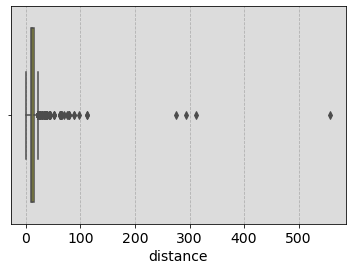

In [105]:
sns.boxplot(vis_data.distance, color='yellow');

Метод межквартильного расстояния выделяет как выбросы все значения, находящиеся за пределами коробки.  
Посмотрим, сколько выбросов он найдет:

In [106]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]

Данный метод чувствителен к пропускам, поэтому избавимся от них:

In [107]:
o = outliers_iqr(vis_data.distance.dropna())

In [108]:
len(o)

134

> __Поиск по распределению__  
> [Источник](http://aqibsaeed.github.io/2016-07-17-anomaly-detection/)

> Еще один способ найти выбросы - построить нормальное распределение поверх данных, посчитать вероятность находиться в данном распределении для каждого значения. Самые невероятные значения будем считать выбросами.

In [109]:
from scipy.stats import norm

def estimate_gaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def get_gaussian(mu, sigma):
    distribution = norm(mu, sigma)
    return distribution

def get_probs(distribution, dataset):
    return distribution.pdf(dataset)

In [110]:
mu, sigma = estimate_gaussian(vis_data.distance.dropna())
distribution = get_gaussian(mu, sigma)
probabilities = get_probs(distribution, vis_data.distance.dropna())

Мы построили нормальное распределение на предоставленных данных и посчитали вероятность появления данной точки при данном распределении для каждого значения. Теперь выберем разумное значение вероятности, ниже которой будем считать точку выбросом. Например, `0.014`:

In [111]:
o_1 = np.where(probabilities < 0.014)[0]

In [112]:
len(o_1)

58

> __DBSCAN__  
Алгоритм кластеризации DBSCAN определяет группы (кластеры) объектов. Его особенностью является то, что кроме самих кластеров он хорошо находит отдельно стоящие элементы, "шум". Применим его для нахождения выбросов. 

In [113]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

`DBSCAN` работает очень медленно, поэтому мы возьмем не все данные:

In [114]:
vis_data.shape

(250306, 36)

In [115]:
normalized_dist = np.random.choice(vis_data.distance.dropna().values, 
                                   50000).reshape(-1, 1)

In [116]:
db = DBSCAN(eps=0.5, min_samples=10).fit(normalized_dist)

Проверим количество выбросов:

In [117]:
len(np.where(db.labels_ == -1)[0])

30

> __Проблемы с выбросами__

> Несмотря на то, что выбросы "портят" общую картину и заставляют статистики в данных (например, среднее) выглядеть неправильно, иногда они очень важны:

> - Если мы занимаемся поиском аномалий (Anomaly Detection), выбросы являются нашими зависимыми переменными, которые необходимо найти, а не значениями, которые нужно выбросить. Поиск аномалий выходит за рамки курса
> - Как можно было понять из методов выше, нет однозначного способа понять, что перед нами выброс. Разные методы возвращают разные точки в качестве выбросов, и эти точки пересекаются лишь частично. Кроме этого, разные параметры дают разные результаты и эти параметры необходимо крутить руками. Из-за этого найденные выбросы является крайне субъективным результатом

__Задания__

Загрузите данные train.csv, найдите признак, обозначающий баланс. Уберите пропуски из этого признака и найдите выбросы с помощью межквартильного расстояния. Найдите модуль разницы между минимальным и максимальным среди значений, которые остались после удаления выбросов.

In [118]:
vis_data = pd.read_csv("train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0


In [119]:
print(balance.max(), balance.min())

11030.0 -7750.0


In [120]:
def iqr(ys):
    ys = ys.dropna().values
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return pd.DataFrame(np.where((ys < upper_bound) & (ys > lower_bound), ys, 0)).values

In [121]:
balance_iqr = iqr(vis_data.balance_due)

In [122]:
balance_iqr.max() - balance_iqr.min()

1201.3

[К содержанию](#1)